# Numerical integration

This is a tutorial on how to create and run a program that will evaluate definite integrals using a numerical integration algorithm. 

I have recorded a video to explain it:

A quick version:    
https://www.youtube.com/watch?v=6gMXfi9Dhfg

A full version on Python test, Mid-point integration and Trapezoidal-rule integration

https://youtu.be/qOo5LkrGIns


More information can be found here: https://math.libretexts.org/Courses/Mount_Royal_University/MATH_2200%3A_Calculus_for_Scientists_II/2%3A_Techniques_of_Integration/2.5%3A_Numerical_Integration_-_Midpoint%2C_Trapezoid%2C_Simpson's_rule

## Step 1: Understanding the Algorithm Part 1: the Definite Integral and Its Use

I will assume you know a little bit of what an integral is in the context of basic calculus. Integrals are important because they allow you to sum an array of values multiplied by an infinitesimal length; this is useful in many areas of finance, number theory, physics, chemistry, as well as many other fields. This program, however, will only allow you to calculate the area underneath a curve for a finite interval, or in other words, it does not evaluate anti-derivatives--a much more powerful algorithm is necessary for that. This algorithm is useful if you need to evaluate a definite integral in a larger program specified toward something else, or if you want to check your answer for any definite integrals done by hand.

A basic definite integral represents the area under a curve defined by a function e.g. f(x). For a definite integral, we seek the area between two points (labeled a and b respectively). In the picture, the turquoise region is the area I'm referring to, and the equation for determining this is also shown in that region. The function shown in the picture is arbitrary.

The idea behind numerical integration is to use simple geometric shapes to approximate the area under the curve  to estimate definite integrals. In this section, we explore the simplest methods of numerical integration: Mid-point sums, the trapezoid rule.

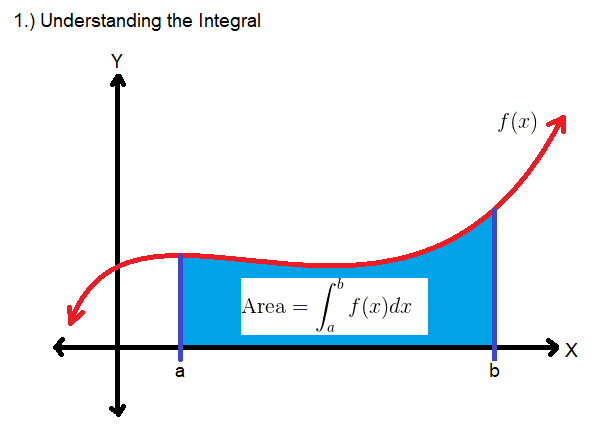

## Step 2: Understanding the Algorithm Part 2: Numerical Approximation

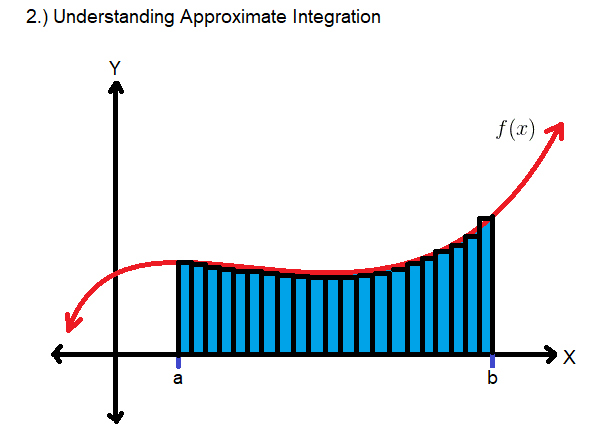

A computer needs a broad set of instructions for calculating that area underneath an arbitrary function that will work for any function, so analytical methods you may be familiar with are of no use since they are too particular. One method to compute integrals approximately, that a computer can actually handle, is done by filling the area of interest with a user-defined amount of rectangles of equal width and variable height then summing up all of the rectangle's areas. The rigid properties of rectangles will leave some of the total area untouched, hence why this is considered an approximation; however, the more rectangles you can cram in between the boundaries (a and b), the more accurate the approximation will be since the untouched regions become more sparse. Since a computer will be doing the task, you can set the number of rectangles in the desired region to be a very large number, making the approximation extremely accurate. In the supporting picture, imagine that each rectangle in the designated area is of equal width. I did my best to make them equal width in Microsoft Paint, but didn't do the best job.

Step 3: Understanding the Algorithm Part 3: the Midpoint Rule (method 1)

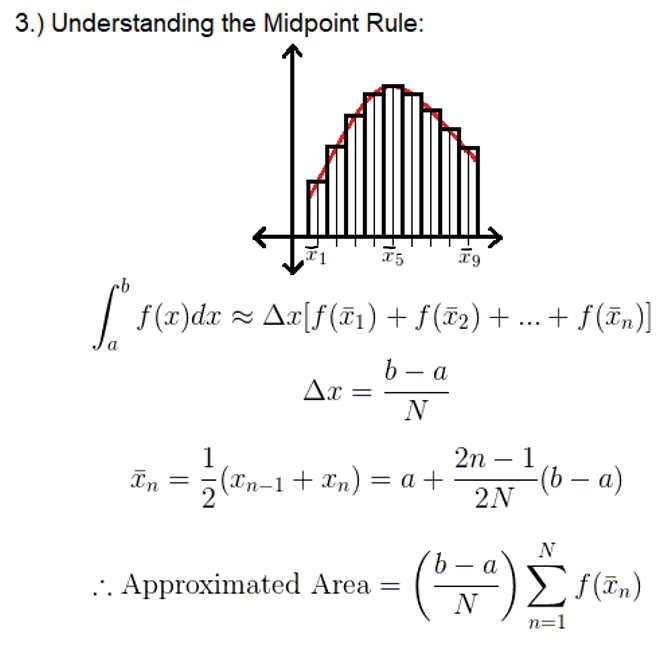

This rule designates how the rectangles are made and used in the approximation. Each rectangle out of "$N$" rectangles has to have an equal width, $\delta x$, but each nth rectangle cannot be the exact same: the varying factor is the height which varies as the function evaluated at a certain point. The midpoint rule gets its name from the fact that you are evaluating the height of each rectangle as $f(\overline{x}_n)$, where "$\overline{x}_n$" is the respective center-point of each rectangle, as apposed to the left or right of the rectangle. Using the midpoint is like implementing an average which will make the approximation more accurate than if you were to use the right or left. The supporting picture for this step summarizes how the midpoint rule is defined mathematically. See the Appendix for the detailed derivation of $\overline{x}_n$.

## Implementation

## 1. Define Parameters

In [3]:
# Import math package to allow for more function arguments
import math
# Define the parameters, type your values here
N= 20 #  The number of intervals in the numerical integration (the more, the more accurate)
a= 0 # the lower integration bound
b= 10 # the upper integration bound

## 2. Create a function for integration

Here we want to define a function to calculate the equation below:

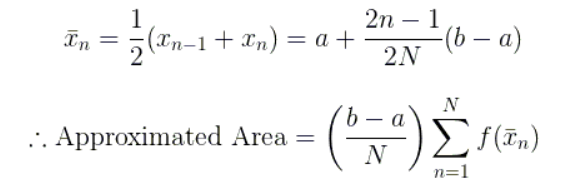

### Example 1:
We start to do an numerical integration $\int _a^b f(x) dx$.

Here the simplest function is a linear function $f(x) =x$

In [6]:
def Integrate (N, a, b):
    def f(x):
        # type your function after return
        f= x   ## This is area you define the function 
        return f # Here this is a linear function, try square function later, you can put your function here
    value=0  # initial value
    TotalArea=0 # initial value
    for n in range(1, N+1): # Here range to N+1, not N
        x_bar = a+(2*n-1)*(b-a)/(2*N)
        value = value + f(x_bar) # sum up all thea values
    TotalArea= ((b-a)/N)*value # Approxiamted area
    return TotalArea    

**Explanation of the code** 

Immediately after defining the "integrate" Python function, you will define another Python function called f(x). This represents the mathematical function that will be integrated. For each different mathematical function you want to integrate, you will have to take to this program line to change it (unlike the variables which are defined when the program is ran). Each Python function will have a return value, this is what the function returns when you throw it a value. In this case the thrown-in value is "x," and this "x" term will take the value of what ever you throw it--it is a temporary value.

Next, a for-loop acts as the summation defined in the formulas in the "Understanding the Algorithm" section of this tutorial. This summation requires a couple more variables, one of which will act as the return value for the entire "Integrate" Python function. Before the for-loop, I have designated these variables as "value," and "value2." the task of the for-loop is to iterate over a range of values for a designated variable, which can conveniently be defined within the for-loop command; in this case, that variable is "n." The range for which the iteration occurs is 1 to N+1. You should notice that the summation defined in the aforementioned formulas only ranges from 1 to N. We define it this way because the Python language range(1, N) counts each iterated value starting from 1 to the value before the specified N, which is N-1. So we essentially change the last value in the range() to N+1, to give the range [1, N]. The for-loop then allows for the summation of all of the rectangle's heights together and stores that value into the variable which I called "value." For each $\overline{x}=a+(2n-1)(b-a)/(2N)$. This is seen in the piece of code that shows up as: value += f(x_bar). 

From there, the next piece of the code utilizes the variable called "value2" which is then assigned to be the sum of all of the heights of each rectangle multiplied by the standardized width of each rectangle--this is our final answer that we want displayed by our program, and is thus the return value of the "Integrate" Python function.

In the above code, there is one new function to understand: **range() function**

It returns a sequence of numbers, starting from 0 by default, and increments by 1 (by default), and stops before a specified number. To understand the range() function, see the two examples below:

In [3]:
x = range(6)
for n in x:
    print(n)

0
1
2
3
4
5


In [4]:
x = range(3, 6)
for n in x:
    print(n)

3
4
5


## 3. Use the integration function

In [8]:
print ("Here is your answer using the Midpoint rule")
print (Integrate (N, a, b))

Here is your answer using the Midpoint rule
50.0


### Now try do an integration on sin(x), with a bound of 0 to $\pi$

In [4]:
def IntegrateSin (N, a, b):
    def f(x):
        # type your function after return
        f= math.sin(x)   ## This is area you define the function 
        return f # Here this is a linear function, try square function later, you can put your function here
    value=0  # initial value
    TotalArea=0 # initial value
    for n in range(1, N+1): # Here range to N+1, not N
        x_bar = a+(2*n-1)*(b-a)/(2*N)
        value = value + f(x_bar) # sum up all thea values
    TotalArea= ((b-a)/N)*value # Approxiamted area
    return TotalArea    

In [5]:
N=20
a=0
b=math.pi
print ("Here is your answer using sinine function")
print (IntegrateSin (N, a, b))

Here is your answer using sinine function
2.002057648285417


# Absolute and Relative Error

An important aspect of using these numerical approximation rules consists of calculating the error in using them for estimating the value of a definite integral. We first need to define absolute error and relative error.

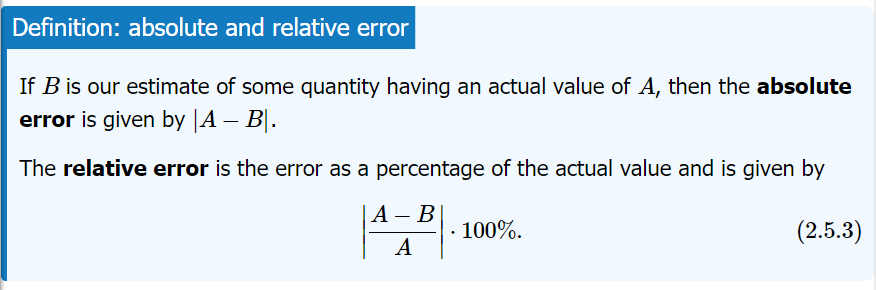

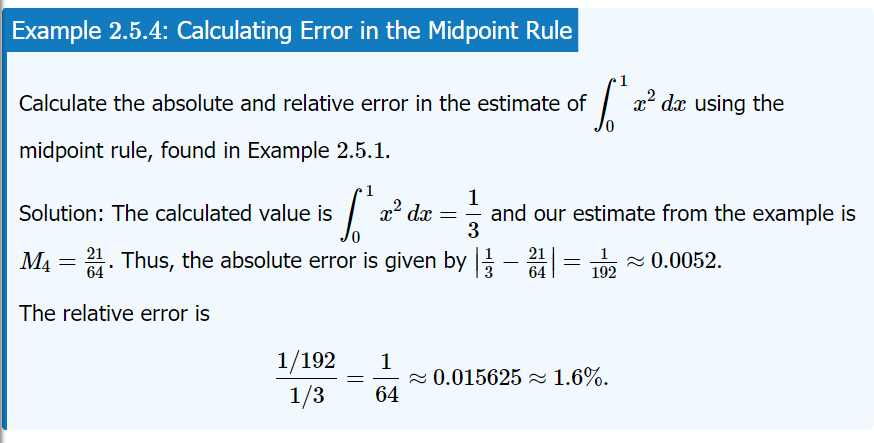

## Example 2:
Calculate the absolute and relative error in the estimate of following function using the midpoint rule.

$\int_{0}^{1} x^2 dx$  


Modify the numerical integration code below and calculate the absolute error and relative error 

###  Numerical integration function

In [ ]:
### Your code ####
# !!!! Modify the code below, particularly the definition of a function
def Integrate (N, a, b):
    def f(x):
        # type your function
        f= x   ## This is area you define your function, !!!!! change this line to define your function!!!! 
        return f # Here this is a linear function, try square function later, you can put your function here
    value=0  # initial value
    TotalArea=0 # initial value
    for n in range(1, N+1): # Here range to N+1, not N
        x_bar = a+(2*n-1)*(b-a)/(2*N)
        value = value + f(x_bar) # sum up all thea values
    TotalArea= ((b-a)/N)*value # Approxiamted area
    return TotalArea    

### Absolute error:

In [8]:
# Your code
## Calculate the answer by hand


## Call the Integrate function to calculate it numerically


## Calculate the absolute error


### Relative error:

In [9]:
# Your code

## Appendix

For details of the derivation of $\overline{x}_n$, see the process below

$\begin{array}{l}
\Delta x = \frac{{b - a}}{N}\\
{x_n} = {x_{n - 1}} + \Delta x\\
{x_n} = a + n\Delta x\\
{{\bar x}_n} = \frac{1}{2}({x_{n - 1}} + {x_n}) = \frac{1}{2}(2{x_{n - 1}} - \Delta x) = {x_n} - \frac{1}{2}\Delta x\\
 = a + n\Delta x - \frac{1}{2}\Delta x = a + (n - \frac{1}{2})\Delta x = a + (n - \frac{1}{2})\frac{{b - a}}{N} = a + \frac{{2n - 1}}{{2N}}(b - a)
\end{array}$